![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [70]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff

# Forzar la recolección de basura
import gc
gc.collect()

# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

# Modelos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.cluster.hierarchy as sch

# *2. Carga de datos*

In [71]:
df = pd.read_csv("./data/dfCluster.csv", sep=";", index_col=False, low_memory=False)

# *3. Exploración de datos*

In [72]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9870 filas y 71 columnas.


In [73]:
df.head(2)

m2_constr  cod_barrio  estado  amueblado  planta  codigo_postal  \
0       0.05        0.81   -0.50       0.00    2.50           0.04   
1       0.00        0.10   -0.50       0.10    1.00          -0.30   

   certificado_energetico  orientacion_este  orientacion_oeste  \
0                       0                 0                  0   
1                       1                 0                  0   

   orientacion_sur  orientacion_norte  num_personas  num_personas_hombres  \
0                0                  0          0.87                  0.91   
1                0                  0         -0.28                 -0.37   

   total_transacciones  viv_nuevas_transacciones  lineas_metro  \
0                 0.02                      1.12         -1.25   
1                 0.00                      0.73          0.75   

   num_lineas_buses  renta_bruta_media_por_persona  habitantes  \
0                 0                          -0.80        1.63   
1                 0                           0.58       -0.13   

   tamano_medio_del_hogar  tamaño_del_hogar_(nº_de_personas_en_la_vivienda)  \
0                    0.77                                              0.16   
1                   -0.51                                              0.11   

   hog_con_10  hog_con_15_y_más  m2_areasverdes  ins_comunitaria  energia  \
0        1.95              0.55            0.80                0        0   
1       -0.54              0.00           -0.35                0        0   

   eficiencia_carpinteria  cod_barrio_group  tipologia_Atico  tipologia_Casa  \
0                       0             -1.00                0               0   
1                       0              0.33                1               0   

   tipologia_Chalet  tipologia_Duplex  tipologia_Estudio  tipologia_Piso  \
0                 0                 0                  0               0   
1                 0                 0                  0              -1   

   antiguedad_Desconocido  antiguedad_Entre_10_30_anos  \
0                       0                            0   
1                      -1                            0   

   antiguedad_Entre_30_50_anos  antiguedad_Entre_5_10_anos  \
0                            0                           0   
1                            1                           0   

   antiguedad_Mas_50_anos  antiguedad_Menos_5_anos  tipo_inmueble_Desconocido  \
0                       0                        0                          0   
1                       0                        0                         -1   

   tipo_inmueble_económico  tipo_inmueble_lujo  tipo_inmueble_medio  \
0                        0                   0                    0   
1                        0                   1                    0   

   tipo_inmueble_señorial  clasificacion_aire_Eficiente  \
0                       0                             0   
1                       0                             0   

   clasificacion_aire_Normal  clasificacion_aire_Sin Aire  tipo_suelo_Baldosa  \
0                          0                            0                   0   
1                          1                            0                   0   

   tipo_suelo_Desconocido  tipo_suelo_Gres  tipo_suelo_Madera  \
0                       0                0                  0   
1                       0                0                  0   

   tipo_suelo_Otros  tipo_suelo_Piedra  tipo_suelo_Radiante  \
0                 0                  0                    0   
1                 0                  0                    0   

   grupo_cocina_Abierta  grupo_cocina_Amueblada  grupo_cocina_Desconocido  \
0                     0                       0                         0   
1                     0                       0                         0   

   grupo_cocina_Equipada  grupo_cocina_Independiente  grupo_cocina_Isla  \
0                      0                           0                  0   
1            

In [74]:
df.columns

Index(['m2_constr', 'cod_barrio', 'estado', 'amueblado', 'planta',
       'codigo_postal', 'certificado_energetico', 'orientacion_este',
       'orientacion_oeste', 'orientacion_sur', 'orientacion_norte',
       'num_personas', 'num_personas_hombres', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'num_lineas_buses',
       'renta_bruta_media_por_persona', 'habitantes', 'tamano_medio_del_hogar',
       'tamaño_del_hogar_(nº_de_personas_en_la_vivienda)', 'hog_con_10',
       'hog_con_15_y_más', 'm2_areasverdes', 'ins_comunitaria', 'energia',
       'eficiencia_carpinteria', 'cod_barrio_group', 'tipologia_Atico',
       'tipologia_Casa', 'tipologia_Chalet', 'tipologia_Duplex',
       'tipologia_Estudio', 'tipologia_Piso', 'antiguedad_Desconocido',
       'antiguedad_Entre_10_30_anos', 'antiguedad_Entre_30_50_anos',
       'antiguedad_Entre_5_10_anos', 'antiguedad_Mas_50_anos',
       'antiguedad_Menos_5_anos', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_

In [75]:
# Renombrar columnas con nombres largos o con caracteres problemáticos
df.rename(columns={
    "tamaño_del_hogar_(nº_de_personas_en_la_vivienda)": "tam_hogar",
    "antiguedad_Entre_10_30_anos": "ant_10_30",
    "antiguedad_Entre_30_50_anos": "ant_30_50",
    "antiguedad_Entre_5_10_anos": "ant_5_10",
    "antiguedad_Menos_5_anos": "ant_menos_5",
    "antiguedad_Mas_50_anos": "ant_mas_50"
}, inplace=True)

# Verificar cambios
df.columns

Index(['m2_constr', 'cod_barrio', 'estado', 'amueblado', 'planta',
       'codigo_postal', 'certificado_energetico', 'orientacion_este',
       'orientacion_oeste', 'orientacion_sur', 'orientacion_norte',
       'num_personas', 'num_personas_hombres', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'num_lineas_buses',
       'renta_bruta_media_por_persona', 'habitantes', 'tamano_medio_del_hogar',
       'tam_hogar', 'hog_con_10', 'hog_con_15_y_más', 'm2_areasverdes',
       'ins_comunitaria', 'energia', 'eficiencia_carpinteria',
       'cod_barrio_group', 'tipologia_Atico', 'tipologia_Casa',
       'tipologia_Chalet', 'tipologia_Duplex', 'tipologia_Estudio',
       'tipologia_Piso', 'antiguedad_Desconocido', 'ant_10_30', 'ant_30_50',
       'ant_5_10', 'ant_mas_50', 'ant_menos_5', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_económico', 'tipo_inmueble_lujo', 'tipo_inmueble_medio',
       'tipo_inmueble_señorial', 'clasificacion_aire_Eficiente',
       'c

In [76]:
# Eliminar la columna 'url'
df = df.drop(columns=['url'])

In [77]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      46
float64    24
Name: count, dtype: int64.


In [78]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
target                           0
m2_constr                        0
cod_barrio                       0
estado                           0
amueblado                        0
planta                           0
tipo_suelo_Radiante              0
grupo_cocina_Abierta             0
grupo_cocina_Amueblada           0
grupo_cocina_Desconocido         0
grupo_cocina_Equipada            0
grupo_cocina_Independiente       0
grupo_cocina_Isla                0
grupo_cocina_No amueblada        0
viv_nuevas_transacciones         0
lineas_metro                     0
num_lineas_buses                 0
renta_bruta_media_por_persona    0
habitantes                       0
tamano_medio_del_hogar           0
tam_hogar                        0
hog_con_10                       0
hog_con_15_y_más                 0
m2_areasverdes                   0
ins_comunitaria                  0
energia                          0
eficiencia_carpinteria  

In [79]:
df.describe(include='all').T

count   mean    std   min   25%  50%  75%  \
m2_constr                     9870.00   0.49   1.84 -1.06 -0.36 0.00 0.63   
cod_barrio                    9870.00   0.19   0.69 -0.66 -0.30 0.00 0.70   
estado                        9870.00   0.20   0.76 -0.50 -0.50 0.00 0.50   
amueblado                     9870.00   0.10   0.30  0.00  0.00 0.00 0.00   
planta                        9870.00   0.30   1.11 -1.50 -0.50 0.00 0.50   
codigo_postal                 9870.00   0.18   0.65 -0.69 -0.34 0.00 0.65   
certificado_energetico        9870.00   0.19   0.39  0.00  0.00 0.00 0.00   
orientacion_este              9870.00   0.06   0.24  0.00  0.00 0.00 0.00   
orientacion_oeste             9870.00   0.05   0.22  0.00  0.00 0.00 0.00   
orientacion_sur               9870.00   0.08   0.27  0.00  0.00 0.00 0.00   
orientacion_norte             9870.00   0.03   0.18  0.00  0.00 0.00 0.00   
num_personas                  9870.00   0.18   0.78 -1.26 -0.39 0.00 0.60   
num_personas_hombres          9870.00   0.68   7.40 -1.25 -0.38 0.00 0.62   
total_transacciones           9870.00   0.06   0.80 -1.30 -0.52 0.00 0.48   
viv_nuevas_transacciones      9870.00   0.80   2.05 -0.30 -0.21 0.00 0.79   
lineas_metro                  9870.00  -0.27   0.58 -1.25 -0.75 0.00 0.25   
num_lineas_buses              9870.00 173.64 308.39  0.00  0.00 0.00 0.00   
renta_bruta_media_por_persona 9870.00   0.04   0.53 -0.80 -0.42 0.00 0.58   
habitantes                    9870.00   0.33   0.81 -1.65 -0.10 0.00 0.90   
tamano_medio_del_hogar        9870.00   0.01   0.70 -1.14 -0.31 0.00 0.69   
tam_hogar                     9870.00  -0.05   0.82 -2.38 -0.51 0.00 0.49   
hog_con_10                    9870.00   0.10   0.87 -0.98 -0.54 0.00 0.46   
hog_con_15_y_más              9870.00  -0.09   0.68 -1.60 -0.55 0.00 0.45   
m2_areasverdes                9870.00   0.77   2.79 -0.35 -0.20 0.00 0.71   
ins_comunitaria               9870.00   0.05   0.24  0.00  0.00 0.00 0.00   
energia                       9870.00   0.27   0.75  0.00  0.00 0.00 0.00   
eficiencia_carpinteria        9870.00   0.24   1.16  0.00  0.00 0.00 0.00   
cod_barrio_group              9870.00  -0.17   0.49 -1.00 -0.67 0.00 0.33   
tipologia_Atico               9870.00   0.04   0.20  0.00  0.00 0.00 0.00   
tipologia_Casa                9870.00   0.03   0.16  0.00  0.00 0.00 0.00   
tipologia_Chalet              9870.00   0.03   0.17  0.00  0.00 0.00 0.00   
tipologia_Duplex              9870.00   0.02   0.13  0.00  0.00 0.00 0.00   
tipologia_Estudio             9870.00   0.01   0.11  0.00  0.00 0.00 0.00   
tipologia_Piso                9870.00  -0.13   0.33 -1.00  0.00 0.00 0.00   
antiguedad_Desconocido        9870.00  -0.34   0.47 -1.00 -1.00 0.00 0.00   
ant_10_30                     9870.00   0.04   0.20  0.00  0.00 0.00 0.00   
ant_30_50                     9870.00   0.05   0.22  0.00  0.00 0.00 0.00   
ant_5_10                      9870.00   0.00   0.05  0.00  0.00 0.00 0.00   
ant_mas_50                    9870.00   0.24   0.43  0.00  0.00 0.00 0.00   
ant_menos_5                   9870.00   0.01   0.09  0.00  0.00 0.00 0.00   
tipo_inmueble_Desconocido     9870.00  -0.19   0.39 -1.00  0.00 0.00 0.00   
tipo_inmueble_económico       9870.00   0.03   0.16  0.00  0.00 0.00 0.00   
tipo_inmueble_lujo            9870.00   0.13   0.34  0.00  0.00 0.00 0.00   
tipo_inmueble_medio           9870.00   0.02   0.13  0.00  0.00 0.00 0.00   
tipo_inmueble_señorial        9870.00   0.01   0.11  0.00  0.00 0.00 0.00   
clasificacion_aire_Eficiente  9870.00   0.00   0.05  0.00  0.00 0.00 0.00   
clasificacion_aire_Normal     9870.00   0.25   0.43  0.00  0.00 0.00 0.00   
clasificacion_aire_Sin Aire   9870.00   0.00   0.03  0.00  0.00 0.00 0.00   
tipo_suelo_Baldosa            9870.00   0.00   0.07  0.00  0.00 0.00 0.00   
tipo_suelo_Desconocido        9870.00  -0.13   0.34 -1.00  0.00 0.00 0.00   
tipo_suelo_Gres               9870.00   0.03   0.16  0.00  0.00 0.00 0.00   
tipo_suelo_Madera           

In [80]:
# Revisamos el escalado y normalización de datos

# Calcular media y desviación estándar de las variables numéricas
resumen_escalado = df.select_dtypes(include=['number']).agg(['mean', 'std']).T

# Mostrar el resumen
resumen_escalado

mean    std
m2_constr                       0.49   1.84
cod_barrio                      0.19   0.69
estado                          0.20   0.76
amueblado                       0.10   0.30
planta                          0.30   1.11
codigo_postal                   0.18   0.65
certificado_energetico          0.19   0.39
orientacion_este                0.06   0.24
orientacion_oeste               0.05   0.22
orientacion_sur                 0.08   0.27
orientacion_norte               0.03   0.18
num_personas                    0.18   0.78
num_personas_hombres            0.68   7.40
total_transacciones             0.06   0.80
viv_nuevas_transacciones        0.80   2.05
lineas_metro                   -0.27   0.58
num_lineas_buses              173.64 308.39
renta_bruta_media_por_persona   0.04   0.53
habitantes                      0.33   0.81
tamano_medio_del_hogar          0.01   0.70
tam_hogar                      -0.05   0.82
hog_con_10                      0.10   0.87
hog_con_15_y_más               -0.09   0.68
m2_areasverdes                  0.77   2.79
ins_comunitaria                 0.05   0.24
energia                         0.27   0.75
eficiencia_carpinteria          0.24   1.16
cod_barrio_group               -0.17   0.49
tipologia_Atico                 0.04   0.20
tipologia_Casa                  0.03   0.16
tipologia_Chalet                0.03   0.17
tipologia_Duplex                0.02   0.13
tipologia_Estudio               0.01   0.11
tipologia_Piso                 -0.13   0.33
antiguedad_Desconocido         -0.34   0.47
ant_10_30                       0.04   0.20
ant_30_50                       0.05   0.22
ant_5_10                        0.00   0.05
ant_mas_50                      0.24   0.43
ant_menos_5                     0.01   0.09
tipo_inmueble_Desconocido      -0.19   0.39
tipo_inmueble_económico         0.03   0.16
tipo_inmueble_lujo              0.13   0.34
tipo_inmueble_medio             0.02   0.13
tipo_inmueble_señorial          0.01   0.11
clasificacion_aire_Eficiente    0.00   0.05
clasificacion_aire_Normal       0.25   0.43
clasificacion_aire_Sin Aire     0.00   0.03
tipo_suelo_Baldosa              0.00   0.07
tipo_suelo_Desconocido         -0.13   0.34
tipo_suelo_Gres                 0.03   0.16
tipo_suelo_Madera               0.09   0.29
tipo_suelo_Otros                0.00   0.06
tipo_suelo_Piedra               0.00   0.02
tipo_suelo_Radiante             0.00   0.05
grupo_cocina_Abierta            0.02   0.14
grupo_cocina_Amueblada          0.02   0.15
grupo_cocina_Desconocido       -0.10   0.30
grupo_cocina_Equipada           0.01   0.09
grupo_cocina_Independiente      0.05   0.21
grupo_cocina_Isla               0.00   0.01
grupo_cocina_No amueblada       0.00   0.01
grupo_cocina_Reformada          0.00   0.01
grupo_cocina_Sin reforma        0.00   0.01
total_estaciones                0.35   0.73
habitaciones                    0.30   0.81
atrib_lujo                      0.20   1.00
atrib                           0.10   0.86
serv_barrio                     0.15   0.93
target                          0.48   1.36

In [81]:
df = df.drop(columns=['num_lineas_buses', 'num_personas_hombres'])

In [82]:
df.shape

(9870, 68)

In [83]:
# Exportar CSV
df.to_csv('dfCluster_limpio.csv', index=False)

# *4. Reducción de dimensionalidad*

En Clustering, el "Análisis de Componentes Principales" o PCA es últil por:
- Reducción de dimensionalidad → Podemos eliminar variables redundantes, conservando solo los PCs más importantes.
- Elimina colinealidad → Como los PCs son independientes entre sí, se evita el problema de variables altamente correlacionadas.
- Mejora el rendimiento → Un clustering sobre PCs puede ser más preciso y rápido.

Cada PC es una nueva dimensión creada a partir de las variables originales.
- PC1 → Explica la mayor parte de la variabilidad en los datos.
- PC2 → Explica la segunda mayor variabilidad, pero es ortogonal (independiente) a PC1.
- PC3, PC4... → Siguen explicando la variabilidad en orden decreciente.

En PCA, cada componente principal es una combinación lineal y explica un porcentaje de la variabilidad total de los datos. Para elegir cuántos componentes usar, podemos analizar:
- La varianza explicada acumulada que se calcula sumando la varianza explicada por los primeros componentes. Regla común: Elegir el número de PCs que explican al menos el 85%-95% de la varianza.

Usar PCA es recomendable si:
- Alta correlación entre variables: Si algunas variables están fuertemente correlacionadas, PCA puede ayudar a reducir redundancias y mejorar la eficiencia del modelo.
- Muchas dimensiones (columnas): Si el número de variables es alto (más de 15-20), PCA puede ayudar a reducir la complejidad y evitar el "curse of dimensionality".
- Mejora en la visualización: Si reducimos a 2 o 3 componentes principales, podremos visualizar mejor los clusters con gráficos 2D o 3D.
- Mejor desempeño del clustering: Algunas técnicas de clustering (como K-Means) funcionan mejor en espacios de menor dimensión.

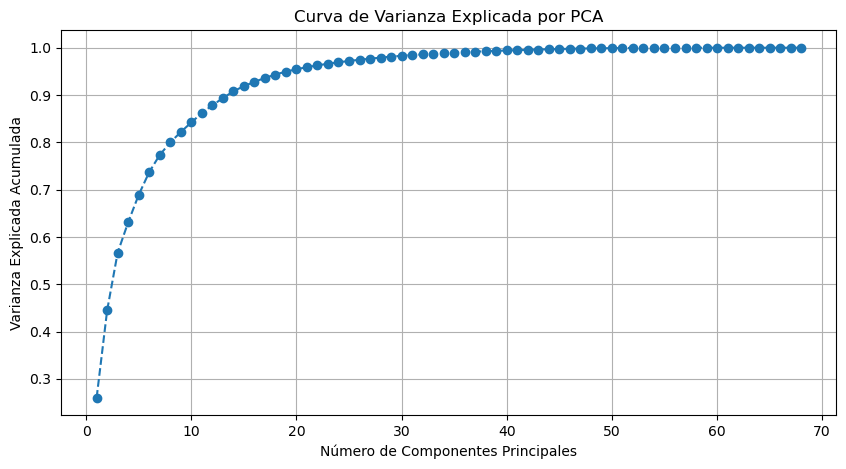

In [84]:
# Seleccionar solo las columnas numéricas para PCA
df_numerico = df.select_dtypes(include=[np.number])

# Aplicar PCA
pca = PCA()
pca.fit(df_numerico)

# Calcular varianza explicada
varianza_explicada = np.cumsum(pca.explained_variance_ratio_)

# Graficar varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Varianza Explicada por PCA')
plt.grid()
plt.show()

In [85]:
# Encontrar el número de componentes que explican al menos el 95% de la varianza
num_componentes_95 = np.argmax(varianza_explicada >= 0.95) + 1

# Devolver el número óptimo de componentes
num_componentes_95

20

# *5. Clustering de viviendas*

## *5.1 Sin eliminar variables*

### *5.1.1 K-Means*
- Se usa cuando esperamos clusters esféricos y bien separados.
- Requiere definir el número de clusters de antemano (se encuentra con el método del codo o silhouette score).

In [86]:
# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=num_componentes_95)
df_pca = pca.fit_transform(df_numerico)

# Método del codo para encontrar el número óptimo de clusters
inercia = []
rango_k = range(1, 11)  # Evaluaremos de 1 a 10 clusters

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(rango_k), y=inercia, mode='lines+markers', marker=dict(size=8), name="Inercia"))

fig.update_layout(
    title="Método del Codo para Selección del Número de Clusters",
    xaxis_title="Número de Clusters",
    yaxis_title="Inercia",
    template="plotly_white"
)

fig.show()

In [87]:
# Calcular el coeficiente de silueta para diferentes valores de k
silhouette_scores = []

for k in range(2, 11):  # Empezamos en 2 porque la silueta no se puede calcular con un solo cluster
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, etiquetas)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(2, 11)), y=silhouette_scores, mode='lines+markers', marker=dict(size=8, color='orange'), name="Coef. Silueta"))

fig.update_layout(
    title="Coeficiente de Silueta para Diferentes Valores de K",
    xaxis_title="Número de Clusters",
    yaxis_title="Coeficiente de Silueta",
    template="plotly_white"
)

fig.show()

In [88]:
# Determinar el mejor número de clusters según ambos métodos
mejor_k_codo = np.argmax(np.diff(inercia)) + 2  # Primera caída pronunciada en la inercia
mejor_k_silueta = rango_k[np.argmax(silhouette_scores)] # Máximo coeficiente de silueta

print('Mejor número de clusters según el "Método Codo" es:', mejor_k_codo)
print('Mejor número de clusters según el "Coeficiente de Silueta" es:', mejor_k_silueta)

Mejor número de clusters según el "Método Codo" es: 10
Mejor número de clusters según el "Coeficiente de Silueta" es: 1


In [89]:
# Entrenar K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(df_pca)

# Agregar las etiquetas al dataset original
df["cluster"] = etiquetas

# Reducir a 2 componentes principales para visualización
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_pca)

# Crear un DataFrame con las coordenadas de PCA y los clusters
df_visualizacion = pd.DataFrame(df_pca_2d, columns=['PCA1', 'PCA2'])
df_visualizacion["Cluster"] = etiquetas

# Graficar los clusters en 2D
fig = px.scatter(
    df_visualizacion, x="PCA1", y="PCA2", color=df_visualizacion["Cluster"].astype(str),
    title="Clusters Identificados con K-Means (k=4)",
    labels={"Cluster": "Grupo"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

In [90]:
# Devolver el DataFrame con la asignación de clusters
df.head()

m2_constr  cod_barrio  estado  amueblado  planta  codigo_postal  \
0       0.05        0.81   -0.50       0.00    2.50           0.04   
1       0.00        0.10   -0.50       0.10    1.00          -0.30   
2       0.39        0.06    2.00       0.00   -0.50          -0.09   
3       1.37       -0.60   -0.50       0.00    0.00          -0.17   
4      -0.70       -0.04   -0.50       0.00    0.00           0.13   

   certificado_energetico  orientacion_este  orientacion_oeste  \
0                       0                 0                  0   
1                       1                 0                  0   
2                       0                 0                  0   
3                       0                 0                  0   
4                       0                 0                  0   

   orientacion_sur  orientacion_norte  num_personas  total_transacciones  \
0                0                  0          0.87                 0.02   
1                0                  0         -0.28                 0.00   
2                0                  0         -0.09                -0.21   
3                0                  0         -0.90                -0.79   
4                0                  0         -0.22                -0.09   

   viv_nuevas_transacciones  lineas_metro  renta_bruta_media_por_persona  \
0                      1.12         -1.25                          -0.80   
1                      0.73          0.75                           0.58   
2                     -0.21          0.75                           0.58   
3                     -0.03          0.25                           0.00   
4                     -0.15          0.00                          -0.24   

   habitantes  tamano_medio_del_hogar  tam_hogar  hog_con_10  \
0        1.63                    0.77       0.16        1.95   
1       -0.13                   -0.51       0.11       -0.54   
2       -0.13                   -0.51       0.11       -0.54   
3       -0.10                   -1.14       1.12        0.00   
4        0.24                   -0.14       0.15        0.66   

   hog_con_15_y_más  m2_areasverdes  ins_comunitaria  energia  \
0              0.55            0.80                0        0   
1              0.00           -0.35                0        0   
2              0.00           -0.35                0        0   
3              0.45           -0.20                0        0   
4             -0.55           -0.14                0        0   

   eficiencia_carpinteria  cod_barrio_group  tipologia_Atico  tipologia_Casa  \
0                       0             -1.00                0               0   
1                       0              0.33                1               0   
2                       0              0.00                0               0   
3                       0              0.00                0               0   
4                       0              0.00                0               0   

   tipologia_Chalet  tipologia_Duplex  tipologia_Estudio  tipologia_Piso  \
0                 0                 0                  0               0   
1                 0                 0                  0              -1   
2                 0                 0                  0               0   
3                 0                 0                  0               0   
4                 0                 0                  0               0   

   antiguedad_Desconocido  ant_10_30  ant_30_50  ant_5_10  ant_mas_50  \
0                       0          0          0         0           0   
1                      -1          0          1         0           0   
2                       0          0          0         0           0   
3                       0          0          0         0           0   
4                       0          0          0         0           0   

   ant_menos_5  tipo_inmueble_Desconocido  tipo_inmueble_económico  \
0            0                          0       

In [91]:
# Identificar variables más representativas por cluster
variables_por_cluster = {}
num_clusters = 4

for cluster in range(num_clusters):
    # Filtrar solo los datos del cluster actual
    datos_cluster = df_numerico[df['cluster'] == cluster]
    
    # Calcular la varianza de cada variable dentro del cluster
    varianza_variables = datos_cluster.var().sort_values(ascending=False)
    
    # Seleccionar las variables con mayor varianza (las más distintivas para ese cluster)
    variables_por_cluster[cluster] = list(varianza_variables.index[:10])  # Tomamos las 10 más representativas

# Convertir en DataFrame para visualizar mejor
df_variables_clusters = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in variables_por_cluster.items()]))

df_variables_clusters

0                       1                         2  \
0  viv_nuevas_transacciones               m2_constr  viv_nuevas_transacciones   
1                 m2_constr                  target                    planta   
2    eficiencia_carpinteria  eficiencia_carpinteria                habitantes   
3                atrib_lujo                  planta                hog_con_10   
4                    planta              atrib_lujo    eficiencia_carpinteria   
5                hog_con_10             serv_barrio              num_personas   
6              num_personas                   atrib                atrib_lujo   
7          total_estaciones            habitaciones                 tam_hogar   
8                habitantes                  estado                   energia   
9                     atrib               tam_hogar       total_transacciones   

                          3  
0                 m2_constr  
1                    target  
2                atrib_lujo  
3                    planta  
4              habitaciones  
5  viv_nuevas_transacciones  
6    eficiencia_carpinteria  
7                     atrib  
8                    estado  
9             codigo_postal

Es esperado que una misma variable aparezca en distintos clusters.
- Si una variable tiene una alta varianza en distintos clusters, significa que está influyendo en la diferenciación entre varios grupos.
- Una variable puede tener valores muy distintos en diferentes clusters.
- A diferencia de algoritmos como Decision Trees, K-Means no elige "atributos exclusivos" para cada cluster. Lo que hace es agrupar puntos en función de distancias, y algunas variables pueden ser relevantes en varias agrupaciones.

In [92]:
estadisticas_clusters = df.groupby("cluster").describe().T

In [93]:
# Identificar las variables más diferenciadoras entre clusters
# Calculamos la desviación estándar de cada variable por cluster para ver cuáles varían más entre grupos
desviaciones_por_cluster = df.groupby("cluster").std()

# Identificar las variables con mayor diferencia entre clusters
variables_clave = desviaciones_por_cluster.mean().sort_values(ascending=False).head(10)
variables_clave

m2_constr                  2.33
viv_nuevas_transacciones   1.38
planta                     1.15
atrib_lujo                 1.12
eficiencia_carpinteria     1.10
target                     1.07
atrib                      0.87
habitaciones               0.86
estado                     0.79
energia                    0.70
dtype: float64

### *5.1.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*
- Útil cuando hay clusters de forma irregular o con ruido.
- No requiere definir el número de clusters, pero es sensible a los parámetros eps y min_samples.

In [94]:
# Aplicar DBSCAN con valores iniciales de hiperparámetros
dbscan = DBSCAN(eps=2, min_samples=5)  # Valores iniciales, pueden ajustarse
etiquetas_dbscan = dbscan.fit_predict(df_pca)

# Agregar las etiquetas al dataset original
df["cluster_dbscan"] = etiquetas_dbscan

# Crear un DataFrame para visualización en 2D
df_visualizacion_dbscan = pd.DataFrame(df_pca_2d, columns=['PCA1', 'PCA2'])
df_visualizacion_dbscan["Cluster"] = etiquetas_dbscan

# Graficar los clusters en 2D
fig = px.scatter(
    df_visualizacion_dbscan, x="PCA1", y="PCA2", color=df_visualizacion_dbscan["Cluster"].astype(str),
    title="Clusters Identificados con DBSCAN",
    labels={"Cluster": "Grupo"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

# Contar número de clusters identificados (ignorar el ruido etiquetado como -1)
num_clusters_dbscan = len(set(etiquetas_dbscan)) - (1 if -1 in etiquetas_dbscan else 0)
num_clusters_dbscan

44

In [95]:
# Analizar la cantidad de elementos en cada cluster
conteo_clusters = df["cluster_dbscan"].value_counts().sort_index()

# Calcular estadísticas descriptivas por cluster
estadisticas_clusters = df.groupby("cluster_dbscan").mean()

# Visualizar el conteo de elementos en cada cluster
fig = px.bar(
    x=conteo_clusters.index, y=conteo_clusters.values,
    labels={'x': 'Cluster', 'y': 'Cantidad de Elementos'},
    title='Cantidad de Elementos por Cluster en DBSCAN',
    text_auto=True,
    color=conteo_clusters.index.astype(str),
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

estadisticas_clusters

m2_constr  cod_barrio  estado  amueblado  planta  \
cluster_dbscan                                                     
-1                   2.38        0.31    0.41       0.17    0.69   
 0                   0.24        0.14    0.18       0.08    0.29   
 1                   0.14       -0.63    0.01       0.17    0.11   
 2                   0.36        0.31    0.12       0.02    0.21   
 3                  -0.10        1.26    0.22       0.02   -0.00   
 4                  -0.22        0.78   -0.15       0.00    0.06   
 5                  -0.23        0.70    0.14       0.03    0.14   
 6                   0.48        0.18    0.20       0.00    0.21   
 7                   0.70       -0.15    0.01       0.05    0.36   
 8                   0.28        1.20    0.27       0.04    0.35   
 9                  -0.36        0.80    0.16       0.07    0.01   
 10                  0.06        0.21    0.10       0.02    0.16   
 11                 -0.09        1.41    0.86       0.03    0.82   
 12                 -0.29        0.22    0.27       0.00    0.25   
 13                  0.42       -0.25    1.51       0.47    0.23   
 14                 -0.11        0.44   -0.30       0.00   -0.10   
 15                  0.33       -0.39    1.36       0.57    0.64   
 16                 -0.15        0.78    0.53       0.00   -0.27   
 17                  0.41        0.34    0.17       0.03    0.00   
 18                 -0.21        1.42    0.26       0.07    0.33   
 19                  0.26       -0.62    1.33       0.83    0.00   
 20                  0.82        0.08   -0.10       0.00    5.55   
 21                 -0.40       -0.01    0.08       0.02   -0.03   
 22                  0.01        1.69    0.18       0.03    0.05   
 23                  1.97        0.37    1.93       0.00   -0.36   
 24                  5.45        0.25    2.00       0.00   -1.00   
 25                  8.46        0.37    2.00       0.00   -1.00   
 26                  0.85       -0.04    0.68       0.00    3.73   
 27                  0.33        0.25   -0.21       0.00    0.57   
 28                 -0.03        1.27    2.00       0.00    0.80   
 29                  1.41        0.10    1.90       0.40    0.60   
 30                  0.19       -0.41    2.00       0.00    1.50   
 31                 -0.26        0.24   -0.12       0.00    0.54   
 32                  3.94        0.25   -0.50       0.00   -1.00   
 33                  0.36       -0.38    1.75       0.25    0.81   
 34                  0.44       -0.66   -0.38       0.00    4.00   
 35                  2.51       -0.15    0.50       0.00    0.92   
 36                  2.48        0.10    1.33       0.33    0.33   
 37                 -0.15       -0.61   -0.50       0.17    9.67   
 38                  0.50        0.18    0.00       0.00    3.75   
 39                  0.91        0.12   -0.50       0.00    3.50   
 40                 -0.34        1.72    0.20       0.20    0.10   
 41                  7.26        0.19   -0.21       0.14   -1.00   
 42                  0.87        1.20    1.60       0.00    2.90   
 43                  6.15       -0.16   -0.50       0.00   -1.00   

                codigo_postal  certificado_energetico  orientacion_este  \
cluster_dbscan                                                            
-1                       0.30                    0.31              0.11   
 0                       0.02                    0.17              0.04   
 1                      -0.21                    0.17              0.05   
 2                      -0.39                    0.22              0.03   
 3                       0.63                    0.21              0.06   
 4                       1.55                    0.12              0.03   
 5                       0.80                    0.18              0.09   
 6                       1.32                    0.10              0.12   
 7                      -0.21                    0.16              0.

### *5.1.3 Agglomerative Clustering (Jerárquico)*
- No requiere definir el número de clusters antes de tiempo.
- Útil para ver estructuras jerárquicas en los datos.

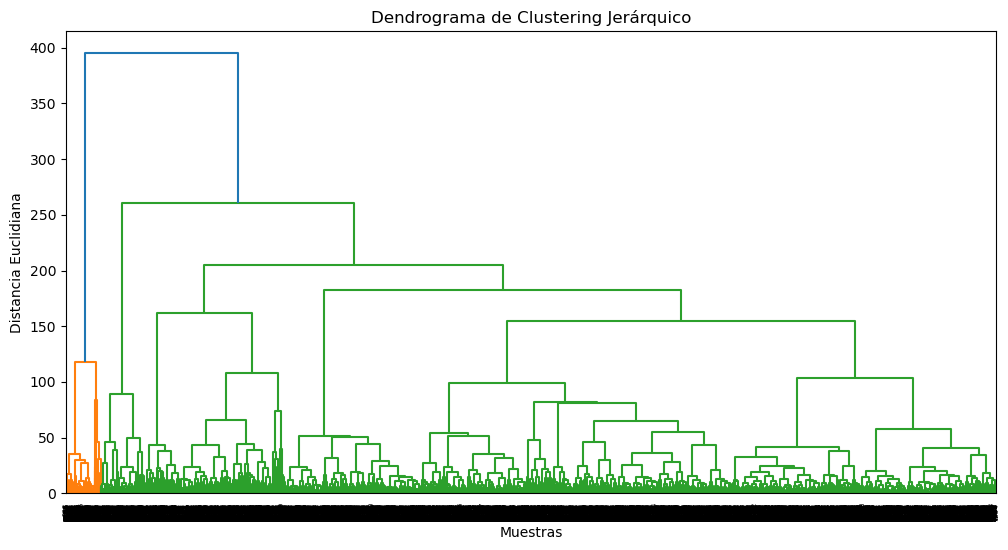

In [96]:
# Generar el dendrograma para visualizar la estructura jerárquica
plt.figure(figsize=(12, 6))
dendrograma = sch.dendrogram(sch.linkage(df_pca, method='ward'))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Muestras")
plt.ylabel("Distancia Euclidiana")
plt.show()

### *5.1.4 Comparación de métodos*

## *5.2 Seleccionando variables*

In [97]:
df2 = pd.read_csv("./data/dfCluster_limpio.csv", index_col=False, low_memory=False)

In [98]:
df2.shape

(9870, 68)

In [99]:
df2.columns

Index(['m2_constr', 'cod_barrio', 'estado', 'amueblado', 'planta',
       'codigo_postal', 'certificado_energetico', 'orientacion_este',
       'orientacion_oeste', 'orientacion_sur', 'orientacion_norte',
       'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
       'lineas_metro', 'renta_bruta_media_por_persona', 'habitantes',
       'tamano_medio_del_hogar', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
       'm2_areasverdes', 'ins_comunitaria', 'energia',
       'eficiencia_carpinteria', 'cod_barrio_group', 'tipologia_Atico',
       'tipologia_Casa', 'tipologia_Chalet', 'tipologia_Duplex',
       'tipologia_Estudio', 'tipologia_Piso', 'antiguedad_Desconocido',
       'ant_10_30', 'ant_30_50', 'ant_5_10', 'ant_mas_50', 'ant_menos_5',
       'tipo_inmueble_Desconocido', 'tipo_inmueble_económico',
       'tipo_inmueble_lujo', 'tipo_inmueble_medio', 'tipo_inmueble_señorial',
       'clasificacion_aire_Eficiente', 'clasificacion_aire_Normal',
       'clasificacion_ai

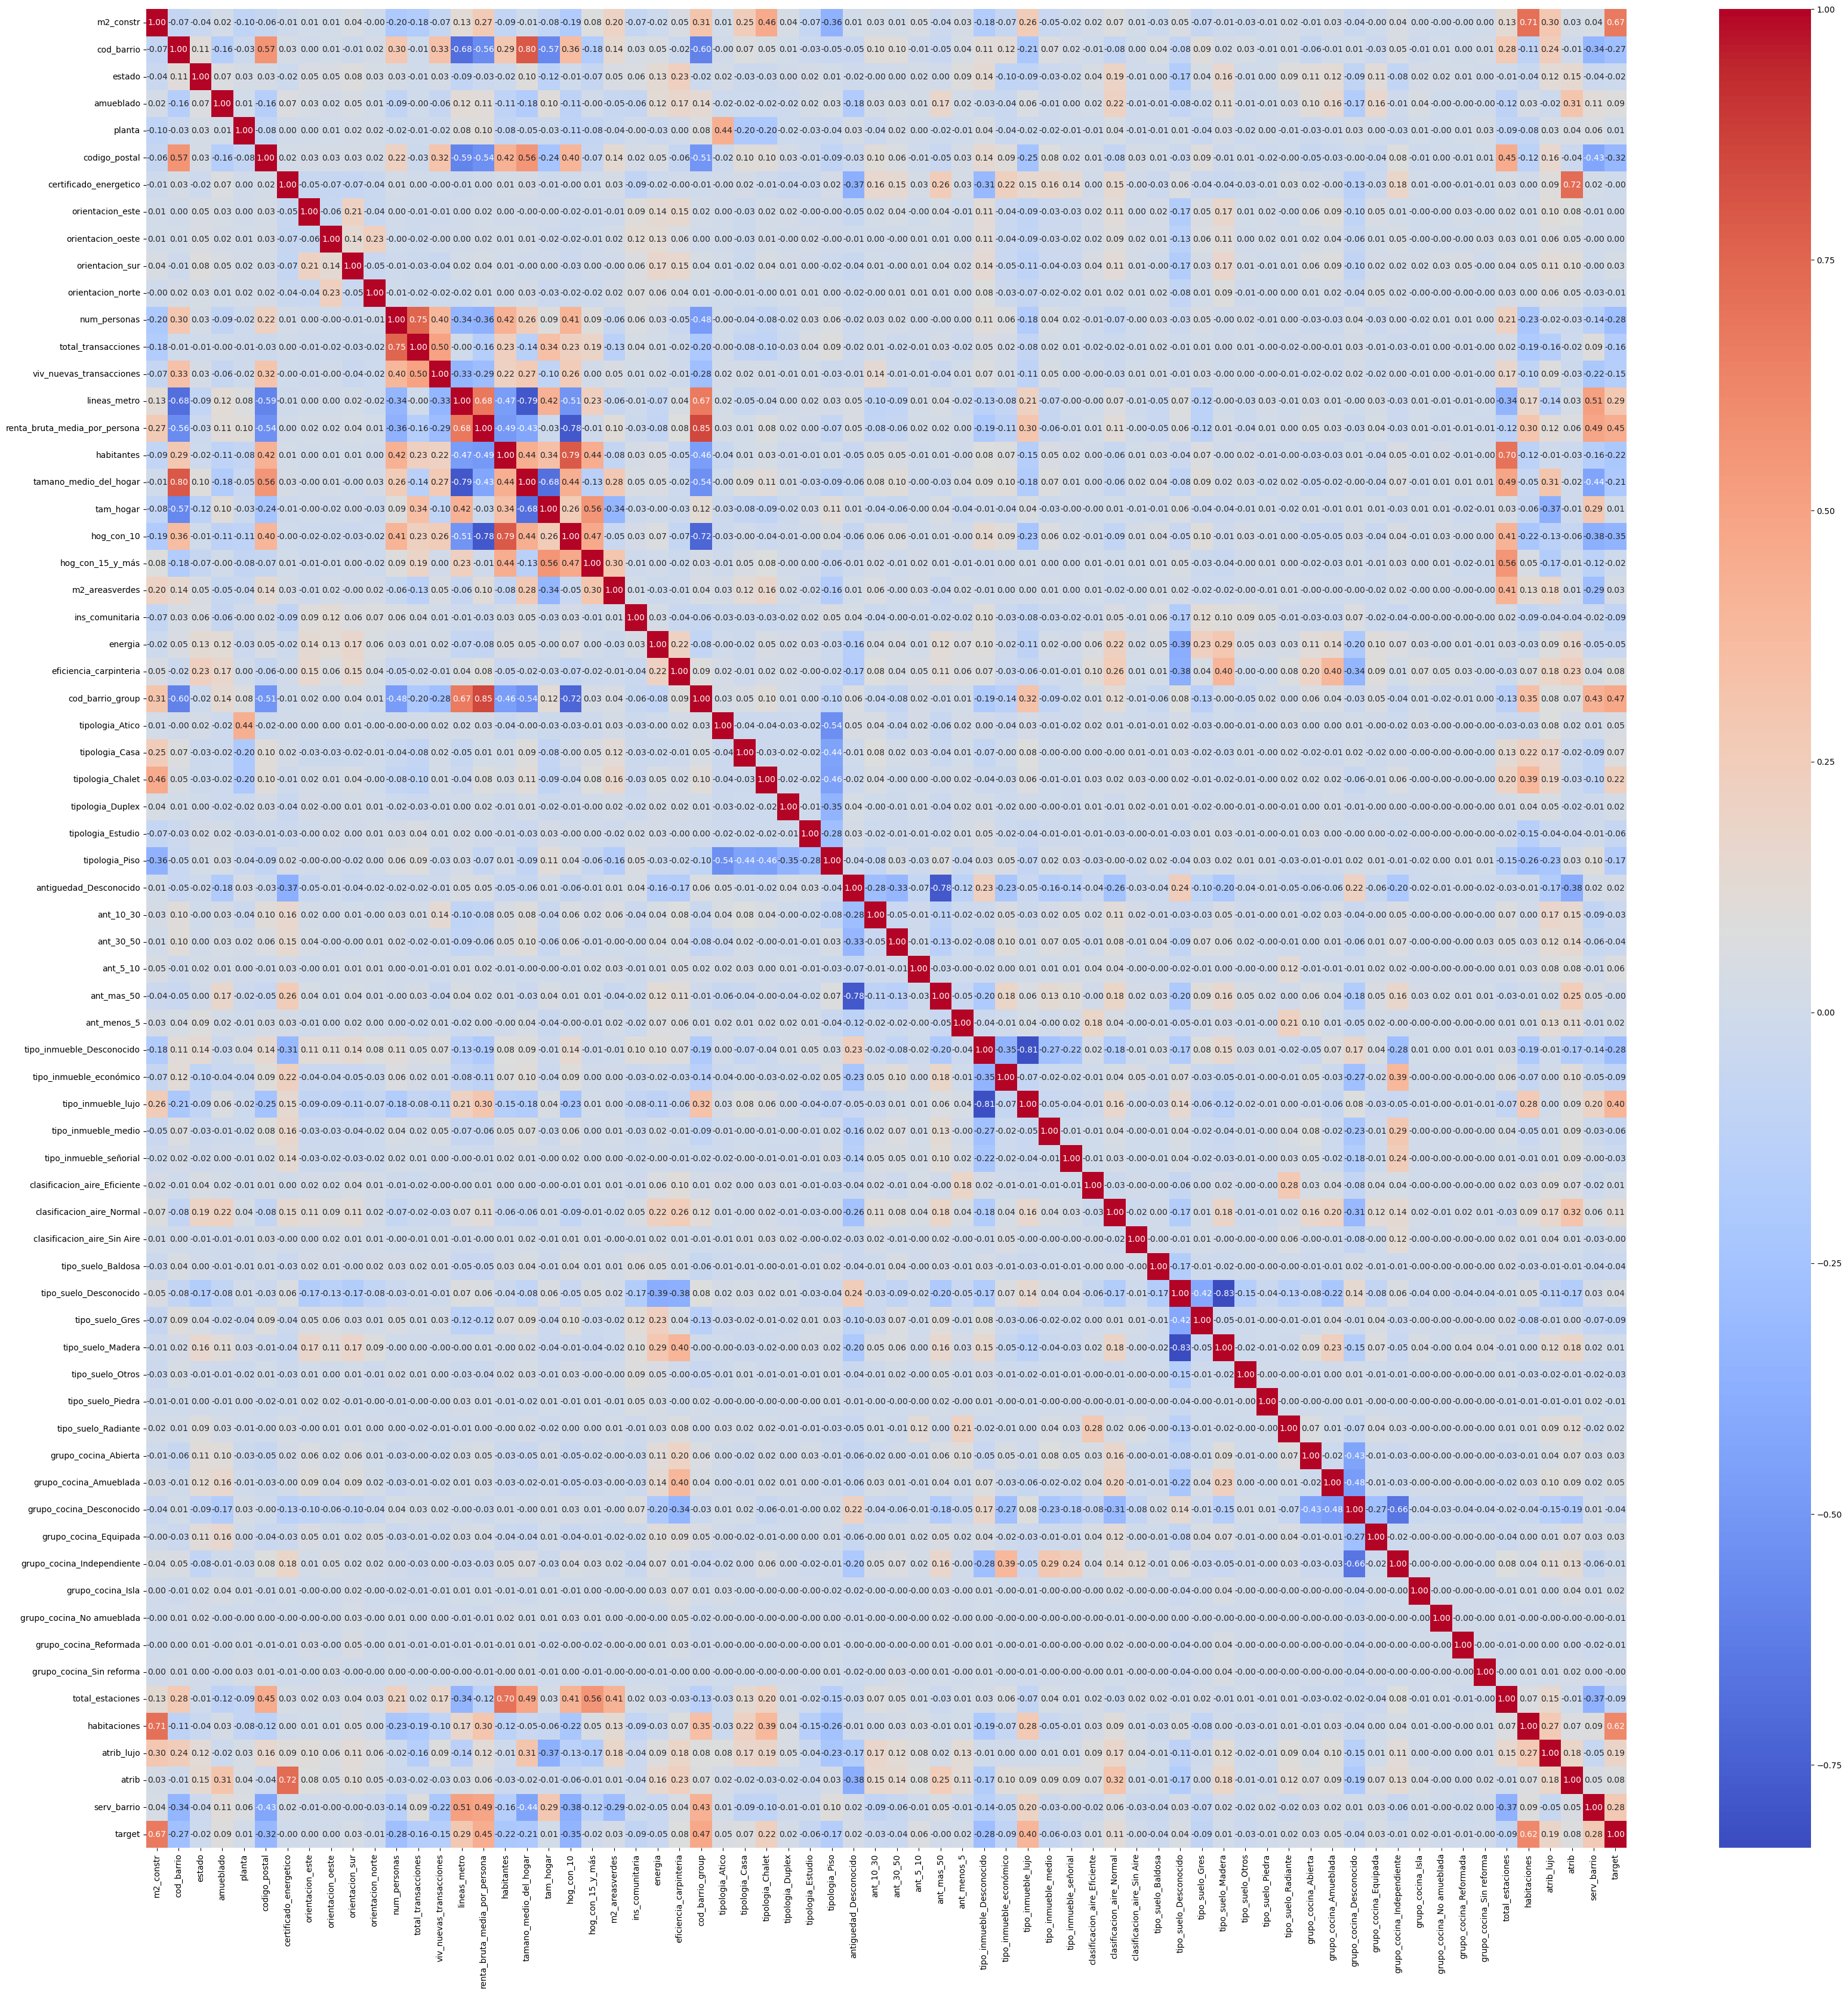

In [100]:
# Seleccionar variables numéricas para el análisis de correlación
variables_numericas = df2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = variables_numericas.corr()

plt.figure(figsize=(40, 40))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f",cmap='coolwarm')
plt.show()

In [101]:
# Filtrar solo las columnas que tienen una correlación >= 5% con la variable 'target'
umbral_correlacion = 0.05
columnas_correladas_target = matriz_correlacion[abs(matriz_correlacion["target"]) >= umbral_correlacion].index.tolist()

# Eliminar 'target' de la lista (para no incluirla en el análisis)
columnas_correladas_target.remove("target")

# Mostrar las columnas seleccionadas
columnas_correladas_target

['m2_constr',
 'cod_barrio',
 'amueblado',
 'codigo_postal',
 'num_personas',
 'total_transacciones',
 'viv_nuevas_transacciones',
 'lineas_metro',
 'renta_bruta_media_por_persona',
 'habitantes',
 'tamano_medio_del_hogar',
 'hog_con_10',
 'ins_comunitaria',
 'eficiencia_carpinteria',
 'cod_barrio_group',
 'tipologia_Atico',
 'tipologia_Casa',
 'tipologia_Chalet',
 'tipologia_Estudio',
 'tipologia_Piso',
 'ant_5_10',
 'tipo_inmueble_Desconocido',
 'tipo_inmueble_económico',
 'tipo_inmueble_lujo',
 'tipo_inmueble_medio',
 'clasificacion_aire_Normal',
 'tipo_suelo_Gres',
 'total_estaciones',
 'habitaciones',
 'atrib_lujo',
 'atrib',
 'serv_barrio']

In [102]:
elegir_columnas = ['target',
 'm2_constr',
 'cod_barrio',
 'amueblado',
 'codigo_postal',
 'num_personas',
 'total_transacciones',
 'viv_nuevas_transacciones',
 'lineas_metro',
 'renta_bruta_media_por_persona',
 'habitantes',
 'tamano_medio_del_hogar',
 'hog_con_10',
 'ins_comunitaria',
 'eficiencia_carpinteria',
 'cod_barrio_group',
 'tipologia_Atico',
 'tipologia_Casa',
 'tipologia_Chalet',
 'tipologia_Estudio',
 'tipologia_Piso',
 'ant_5_10',
 'tipo_inmueble_Desconocido',
 'tipo_inmueble_económico',
 'tipo_inmueble_lujo',
 'tipo_inmueble_medio',
 'clasificacion_aire_Normal',
 'tipo_suelo_Gres',
 'total_estaciones',
 'habitaciones',
 'atrib_lujo',
 'atrib',
 'serv_barrio']

df3 = df2[elegir_columnas]

df3.columns

Index(['target', 'm2_constr', 'cod_barrio', 'amueblado', 'codigo_postal',
       'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
       'lineas_metro', 'renta_bruta_media_por_persona', 'habitantes',
       'tamano_medio_del_hogar', 'hog_con_10', 'ins_comunitaria',
       'eficiencia_carpinteria', 'cod_barrio_group', 'tipologia_Atico',
       'tipologia_Casa', 'tipologia_Chalet', 'tipologia_Estudio',
       'tipologia_Piso', 'ant_5_10', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_económico', 'tipo_inmueble_lujo', 'tipo_inmueble_medio',
       'clasificacion_aire_Normal', 'tipo_suelo_Gres', 'total_estaciones',
       'habitaciones', 'atrib_lujo', 'atrib', 'serv_barrio'],
      dtype='object')

In [103]:
# Aplicar MinMaxScaler
scaler = MinMaxScaler()
df3_normalizado = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)

# Verificar los valores normalizados
df3_normalizado.describe(include='all').T

count  mean  std  min  25%  50%  75%  max
target                        9870.00  0.04 0.06 0.00 0.01 0.02 0.05 1.00
m2_constr                     9870.00  0.03 0.03 0.00 0.01 0.02 0.03 1.00
cod_barrio                    9870.00  0.35 0.28 0.00 0.15 0.27 0.55 1.00
amueblado                     9870.00  0.10 0.30 0.00 0.00 0.00 0.00 1.00
codigo_postal                 9870.00  0.37 0.28 0.00 0.15 0.30 0.57 1.00
num_personas                  9870.00  0.39 0.21 0.00 0.23 0.34 0.50 1.00
total_transacciones           9870.00  0.42 0.25 0.00 0.24 0.40 0.55 1.00
viv_nuevas_transacciones      9870.00  0.07 0.13 0.00 0.01 0.02 0.07 1.00
lineas_metro                  9870.00  0.49 0.29 0.00 0.25 0.62 0.75 1.00
renta_bruta_media_por_persona 9870.00  0.49 0.31 0.00 0.22 0.47 0.80 1.00
habitantes                    9870.00  0.55 0.22 0.00 0.43 0.45 0.70 1.00
tamano_medio_del_hogar        9870.00  0.49 0.30 0.00 0.35 0.48 0.77 1.00
hog_con_10                    9870.00  0.32 0.26 0.00 0.13 0.29 0.43 1.00
ins_comunitaria               9870.00  0.02 0.12 0.00 0.00 0.00 0.00 1.00
eficiencia_carpinteria        9870.00  0.03 0.14 0.00 0.00 0.00 0.00 1.00
cod_barrio_group              9870.00  0.62 0.37 0.00 0.25 0.75 1.00 1.00
tipologia_Atico               9870.00  0.04 0.20 0.00 0.00 0.00 0.00 1.00
tipologia_Casa                9870.00  0.03 0.16 0.00 0.00 0.00 0.00 1.00
tipologia_Chalet              9870.00  0.03 0.17 0.00 0.00 0.00 0.00 1.00
tipologia_Estudio             9870.00  0.01 0.11 0.00 0.00 0.00 0.00 1.00
tipologia_Piso                9870.00  0.87 0.33 0.00 1.00 1.00 1.00 1.00
ant_5_10                      9870.00  0.00 0.05 0.00 0.00 0.00 0.00 1.00
tipo_inmueble_Desconocido     9870.00  0.81 0.39 0.00 1.00 1.00 1.00 1.00
tipo_inmueble_económico       9870.00  0.03 0.16 0.00 0.00 0.00 0.00 1.00
tipo_inmueble_lujo            9870.00  0.13 0.34 0.00 0.00 0.00 0.00 1.00
tipo_inmueble_medio           9870.00  0.02 0.13 0.00 0.00 0.00 0.00 1.00
clasificacion_aire_Normal     9870.00  0.25 0.43 0.00 0.00 0.00 0.00 1.00
tipo_suelo_Gres               9870.00  0.03 0.16 0.00 0.00 0.00 0.00 1.00
total_estaciones              9870.00  0.32 0.24 0.00 0.17 0.21 0.50 1.00
habitaciones                  9870.00  0.14 0.09 0.00 0.07 0.11 0.18 1.00
atrib_lujo                    9870.00  0.17 0.14 0.00 0.14 0.14 0.29 1.00
atrib                         9870.00  0.25 0.13 0.00 0.15 0.23 0.31 1.00
serv_barrio                   9870.00  0.47 0.30 0.00 0.24 0.42 0.57 1.00

In [104]:
# Exportar el DataFrame normalizado
df3_normalizado.to_csv("dfCluster_normalizado.csv", index=False)

### *5.2.1 K-Means*

In [105]:
# Definir el rango de k a evaluar
rango_k2 = range(1, 11)
inercias_2 = []

# Calcular la inercia para cada valor de k
for k in rango_k2:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df3_normalizado)
    inercias_2.append(kmeans.inertia_)

# Graficar el método del codo
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(rango_k2), y=inercias_2, mode='lines+markers', marker=dict(size=8, color='blue'), name="Inercia"))

fig.update_layout(
    title="Método del Codo para Selección del Número de Clusters",
    xaxis_title="Número de Clusters",
    yaxis_title="Inercia",
    template="plotly_white"
)

fig.show()

In [106]:
# Calcular el coeficiente de silueta para diferentes valores de k
silhouette_scores2 = []

for k in range(2, 11):  # Empezamos en 2 porque la silueta no se puede calcular con un solo cluster
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas2 = kmeans.fit_predict(df3_normalizado)
    score2 = silhouette_score(df3_normalizado, etiquetas2)
    silhouette_scores2.append(score2)

# Graficar el coeficiente de silueta
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(2, 11)), y=silhouette_scores2, mode='lines+markers', marker=dict(size=8, color='orange'), name="Coef. Silueta"))

fig.update_layout(
    title="Coeficiente de Silueta para Diferentes Valores de K",
    xaxis_title="Número de Clusters",
    yaxis_title="Coeficiente de Silueta",
    template="plotly_white"
)

fig.show()

In [107]:
# Determinar el mejor número de clusters según ambos métodos
mejor_k_codo2 = np.argmax(np.diff(inercias_2)) + 2  # Primera caída pronunciada en la inercia
mejor_k_silueta2 = rango_k2[np.argmax(silhouette_scores2)] # Máximo coeficiente de silueta

print('Mejor número de clusters según el "Método Codo" es:', mejor_k_codo2)
print('Mejor número de clusters según el "Coeficiente de Silueta" es:', mejor_k_silueta2)

Mejor número de clusters según el "Método Codo" es: 9
Mejor número de clusters según el "Coeficiente de Silueta" es: 2


In [116]:
# Entrenar K-Means con 4 clusters
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=10)
etiquetas3 = kmeans2.fit_predict(df3_normalizado)

# Agregar las etiquetas al dataset original
df["cluster_kmeans"] = etiquetas3

# Reducir a 2 componentes principales para visualización
pca2_2d = PCA(n_components=2)
df3_normalizado_2d = pca2_2d.fit_transform(df3_normalizado)

# Crear un DataFrame con las coordenadas de PCA y los clusters
df_visualizacion2 = pd.DataFrame(df3_normalizado_2d, columns=['PCA1', 'PCA2'])
df_visualizacion2["Cluster"] = etiquetas3

# Graficar los clusters en 2D
fig = px.scatter(
    df_visualizacion2, x="PCA1", y="PCA2", color=df_visualizacion2["Cluster"].astype(str),
    title="Clusters Identificados con K-Means (k=4)",
    labels={"Cluster": "Grupo"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

### *5.2.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*

In [117]:
# Aplicar DBSCAN con valores iniciales de hiperparámetros
dbscan2 = DBSCAN(eps=2, min_samples=5)  # Valores iniciales, pueden ajustarse
etiquetas_dbscan2 = dbscan2.fit_predict(df3_normalizado)

# Agregar las etiquetas al dataset original
df3_normalizado["cluster_dbscan"] = etiquetas_dbscan2

# Crear un DataFrame para visualización en 2D
df_visualizacion_dbscan2 = pd.DataFrame(df3_normalizado_2d, columns=['PCA1', 'PCA2'])
df_visualizacion_dbscan2["Cluster"] = etiquetas_dbscan2

# Graficar los clusters en 2D
fig = px.scatter(
    df_visualizacion_dbscan2, x="PCA1", y="PCA2", color=df_visualizacion_dbscan2["Cluster"].astype(str),
    title="Clusters Identificados con DBSCAN",
    labels={"Cluster": "Grupo"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

# Contar número de clusters identificados (ignorar el ruido etiquetado como -1)
num_clusters_dbscan2 = len(set(etiquetas_dbscan2)) - (1 if -1 in etiquetas_dbscan2 else 0)
num_clusters_dbscan2

1

### *5.2.3 Agglomerative Clustering (Jerárquico)*

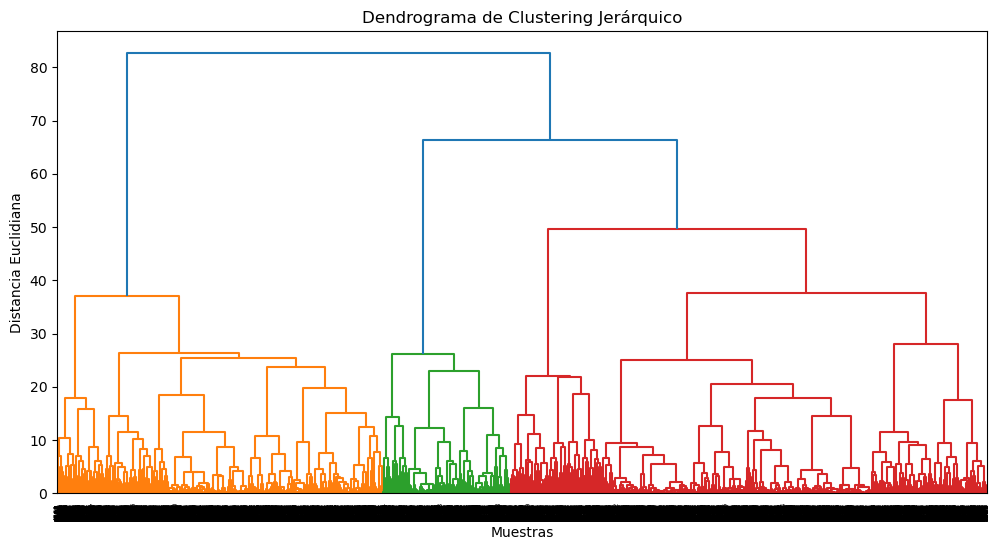

In [118]:
# Generar el dendrograma para visualizar la estructura jerárquica
plt.figure(figsize=(12, 6))
dendrograma2 = sch.dendrogram(sch.linkage(df3_normalizado, method='ward'))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Muestras")
plt.ylabel("Distancia Euclidiana")
plt.show()

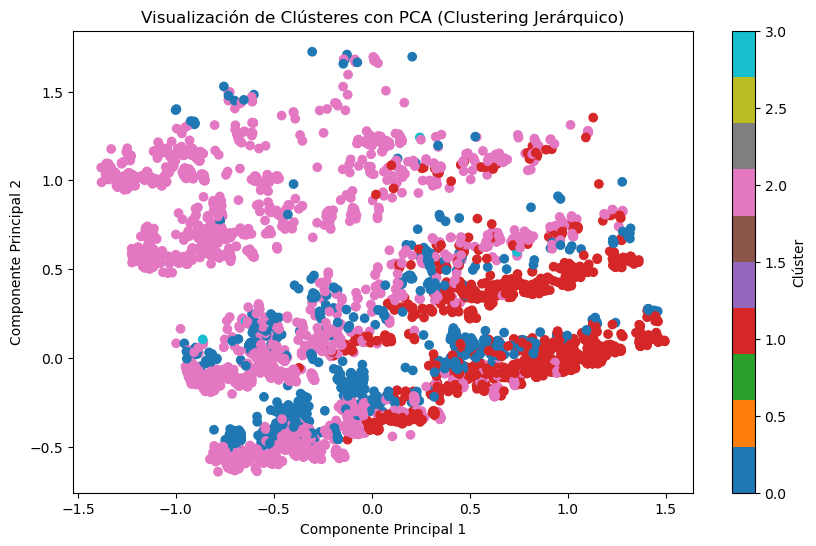

In [120]:
# Aplicar Agglomerative Clustering con 4 clústeres (basado en la estructura del dendrograma)
agg_clustering = AgglomerativeClustering(n_clusters=4,linkage='complete')
df3_normalizado["cluster_jerarquico"] = agg_clustering.fit_predict(df3_normalizado)

# Reducir la dimensionalidad con PCA para visualización en 2D
df_cluster_pca2_2d_jerarquico = pca2_2d.fit_transform(df3_normalizado.drop(columns=["cluster_jerarquico"]))

# Graficar la distribución de los clústeres en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_cluster_pca2_2d_jerarquico[:, 0], df_cluster_pca2_2d_jerarquico[:, 1], 
                      c=df3_normalizado["cluster_jerarquico"], cmap="tab10", alpha=1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clústeres con PCA (Clustering Jerárquico)')
plt.colorbar(scatter, label="Clúster")
plt.show()

### *5.2.4 Comparación de métodos*

## *6. Interpretación de Clusters*

### *6.1 Análisis de características*

### *6.2 Validación de la calidad de los Clusters*

### *6.3 Aplicación del resultado a la problemática*